## Download molecules which interact with Glutamate receptor ionotropic, NMDA 1

We are going to download all the molecules that interact with Glutamate receptor ionotropic, NMDA 1, deposited in Uniprot, UniProtKB - P35439 (NMDZ1_RAT)

### Connect to ChEMBL database

Loading ChEMBL webresource client and python libraries

In [1]:
from chembl_webresource_client.new_client import new_client
import pandas as pd
import math
from rdkit.Chem import PandasTools

Resource objects for API access. more information about ChEMBL API https://www.ebi.ac.uk/chembl/api/data/docs

In [2]:
targets = new_client.target
compounds = new_client.molecule
bioactivities = new_client.activity

Getting information about NMDA 1, UniProtKB - P35439

In [3]:
uniprot_id = 'P35439'
target_P35439 = targets.get(target_components__accession=uniprot_id) \
                       .only('target_chembl_id', 'organism', 'pref_name', 'target_type')
print(type(target_P35439))
pd.DataFrame.from_records(target_P35439)

<class 'chembl_webresource_client.query_set.QuerySet'>


,organism,pref_name,target_chembl_id,target_type
0,Rattus norvegicus,Glutamate (NMDA) receptor subunit zeta 1,CHEMBL330,SINGLE PROTEIN
1,Rattus norvegicus,Glutamate (NMDA) receptor subunit zeta 1,CHEMBL330,SINGLE PROTEIN
2,Rattus norvegicus,Glutamate NMDA receptor,CHEMBL1907608,PROTEIN COMPLEX GROUP
3,Rattus norvegicus,Glutamate NMDA receptor; Grin1/Grin2b,CHEMBL2096666,PROTEIN COMPLEX
4,Rattus norvegicus,Glutamate receptors; NMDA/AMPA,CHEMBL2096669,PROTEIN COMPLEX GROUP
5,Rattus norvegicus,Glutamate NMDA receptor; Grin1/Grin2a,CHEMBL2096680,PROTEIN COMPLEX
6,Rattus norvegicus,Glutamate NMDA receptor; Grin1/Grin2c,CHEMBL2096911,PROTEIN COMPLEX
7,Rattus norvegicus,Ionotropic glutamate receptor NMDA 1/2D,CHEMBL3038506,PROTEIN COMPLEX
8,Rattus norvegicus,Ionotropic glutamate receptor NMDA1/2B,CHEMBL4106155,PROTEIN COMPLEX
9,Rattus norvegicus,Ionotropic glutamate receptor NMDA1/2A/2B,CHEMBL4106156,PROTEIN COMPLEX


### After checking the entries, we select the first entry as our target of interest
`CHEMBL330`: It is a Component of NMDA receptor complexes that function as heterotetrameric, ligand-gated ion channels with high calcium permeability and voltage-dependent sensitivity to magnesium. Channel activation requires binding of the neurotransmitter glutamate to the epsilon subunit, glycine binding to the zeta subunit, plus membrane depolarization to eliminate channel inhibition by Mg2+

In [5]:
target = target_P35439[0]
target

{'organism': 'Rattus norvegicus',
 'pref_name': 'Glutamate (NMDA) receptor subunit zeta 1',
 'target_chembl_id': 'CHEMBL330',
 'target_type': 'SINGLE PROTEIN'}

Saving selected ChEMBL-ID.

In [6]:
chembl_id = target['target_chembl_id']
chembl_id

'CHEMBL330'

### Bioactivity data

To query bioactivity data for the target of interest.

#### Download and filter bioactivities for the target

In this step, we download and filter the bioactivity data and only consider

* human proteins
* bioactivity type IC50
* exact measurements (relation '=')    
* binding data (assay type 'B')

In [7]:
bioact = bioactivities.filter(target_chembl_id = chembl_id) \
                      .filter(type = 'IC50') \
                      .filter(relation = '=') \
                      .filter(assay_type = 'B') \
                      .only('activity_id','assay_chembl_id', 'assay_description', 'assay_type', \
                            'molecule_chembl_id', 'type', 'units', 'relation', 'value', \
                            'target_chembl_id', 'target_organism')
len(bioact), len(bioact[0]), type(bioact), type(bioact[0])

(359, 11, chembl_webresource_client.query_set.QuerySet, dict)

#### Clean and convert bioactivity data



In [8]:
bioact[0]

{'activity_id': 33023,
 'assay_chembl_id': 'CHEMBL752332',
 'assay_description': 'In vitro ability to displace [3H]L-689,560 binding to glycine site on the N-methyl-D-aspartate (NMDA) glutamate receptor 1 from rat cortical membranes',
 'assay_type': 'B',
 'molecule_chembl_id': 'CHEMBL352332',
 'relation': '=',
 'target_chembl_id': 'CHEMBL330',
 'target_organism': 'Rattus norvegicus',
 'type': 'IC50',
 'units': 'uM',
 'value': '0.5'}

Converting to pandas dataframe and show the first 20 results 

In [9]:
bioact_df = pd.DataFrame.from_records(bioact)
bioact_df.head(20)

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,target_chembl_id,target_organism,type,units,value
0,33023,CHEMBL752332,"In vitro ability to displace [3H]L-689,560 bin...",B,CHEMBL352332,=,CHEMBL330,Rattus norvegicus,IC50,uM,0.5
1,33023,CHEMBL752332,"In vitro ability to displace [3H]L-689,560 bin...",B,CHEMBL352332,=,CHEMBL330,Rattus norvegicus,IC50,uM,0.5
2,34260,CHEMBL752332,"In vitro ability to displace [3H]L-689,560 bin...",B,CHEMBL164930,=,CHEMBL330,Rattus norvegicus,IC50,uM,0.75
3,34263,CHEMBL752332,"In vitro ability to displace [3H]L-689,560 bin...",B,CHEMBL167201,=,CHEMBL330,Rattus norvegicus,IC50,uM,3.2
4,35502,CHEMBL752332,"In vitro ability to displace [3H]L-689,560 bin...",B,CHEMBL164831,=,CHEMBL330,Rattus norvegicus,IC50,uM,1.1
5,36723,CHEMBL752332,"In vitro ability to displace [3H]L-689,560 bin...",B,CHEMBL351441,=,CHEMBL330,Rattus norvegicus,IC50,uM,1.7
6,37854,CHEMBL752332,"In vitro ability to displace [3H]L-689,560 bin...",B,CHEMBL335431,=,CHEMBL330,Rattus norvegicus,IC50,uM,6.7
7,39088,CHEMBL752332,"In vitro ability to displace [3H]L-689,560 bin...",B,CHEMBL165378,=,CHEMBL330,Rattus norvegicus,IC50,uM,0.78
8,39091,CHEMBL752332,"In vitro ability to displace [3H]L-689,560 bin...",B,CHEMBL351884,=,CHEMBL330,Rattus norvegicus,IC50,uM,0.27
9,40244,CHEMBL752332,"In vitro ability to displace [3H]L-689,560 bin...",B,CHEMBL165449,=,CHEMBL330,Rattus norvegicus,IC50,uM,0.19


In [10]:
bioact_df.shape

(360, 11)

Delete entries with missing values.

In [11]:
bioact_df = bioact_df.dropna(axis=0, how = 'any')
bioact_df.shape

(351, 11)

Delete duplicates:
Sometimes the same molecule (`molecule_chembl_id`) has been tested more than once, in this case, we only keep the first one.

In [12]:
bioact_df = bioact_df.drop_duplicates('molecule_chembl_id', keep = 'first')
bioact_df.shape

(312, 11)

We would like to only keep bioactivity data measured in molar units. The following print statements will help us to see what units are contained and to control what is kept after dropping some rows.

In [13]:
print(bioact_df.units.unique())
bioact_df = bioact_df.drop(bioact_df.index[~bioact_df.units.str.contains('M')])
print(bioact_df.units.unique())
bioact_df.shape

['uM' 'nM']
['uM' 'nM']


(312, 11)

Since we deleted some rows, but we want to iterate over the index later, we reset index to be continuous.

In [14]:
bioact_df = bioact_df.reset_index(drop=True) 
bioact_df.head()

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,target_chembl_id,target_organism,type,units,value
0,33023,CHEMBL752332,"In vitro ability to displace [3H]L-689,560 bin...",B,CHEMBL352332,=,CHEMBL330,Rattus norvegicus,IC50,uM,0.5
1,34260,CHEMBL752332,"In vitro ability to displace [3H]L-689,560 bin...",B,CHEMBL164930,=,CHEMBL330,Rattus norvegicus,IC50,uM,0.75
2,34263,CHEMBL752332,"In vitro ability to displace [3H]L-689,560 bin...",B,CHEMBL167201,=,CHEMBL330,Rattus norvegicus,IC50,uM,3.2
3,35502,CHEMBL752332,"In vitro ability to displace [3H]L-689,560 bin...",B,CHEMBL164831,=,CHEMBL330,Rattus norvegicus,IC50,uM,1.1
4,36723,CHEMBL752332,"In vitro ability to displace [3H]L-689,560 bin...",B,CHEMBL351441,=,CHEMBL330,Rattus norvegicus,IC50,uM,1.7


To allow further comparison of the IC50 values, we convert all units to nM. First, we write a helper function, which can be applied to the whole dataframe in the next step.

In [15]:
def convert_to_NM(unit, bioactivity):
#     c=0
# for i, unit in enumerate(bioact_df.units):
    if unit != "nM":        
        if unit == "pM":
            value = float(bioactivity)/1000
        elif unit == "10'-11M":
            value = float(bioactivity)/100
        elif unit == "10'-10M":
            value = float(bioactivity)/10
        elif unit == "10'-8M":
            value = float(bioactivity)*10
        elif unit == "10'-1microM" or unit == "10'-7M":
            value = float(bioactivity)*100
        elif unit == "uM" or unit == "/uM" or unit == "10'-6M":
            value = float(bioactivity)*1000
        elif unit == "10'1 uM":
            value = float(bioactivity)*10000
        elif unit == "10'2 uM":
            value = float(bioactivity)*100000
        elif unit == "mM":
            value = float(bioactivity)*1000000
        elif unit == "M":
            value = float(bioactivity)*1000000000
        else:
            print ('unit not recognized...', unit)
        return value
    else: return bioactivity

In [16]:
bioactivity_nM = []
for i, row in bioact_df.iterrows():
    bioact_nM = convert_to_NM(row['units'], row['value'])
    bioactivity_nM.append(bioact_nM)
bioact_df['value'] = bioactivity_nM
bioact_df['units'] = 'nM'
bioact_df.head()

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,target_chembl_id,target_organism,type,units,value
0,33023,CHEMBL752332,"In vitro ability to displace [3H]L-689,560 bin...",B,CHEMBL352332,=,CHEMBL330,Rattus norvegicus,IC50,nM,500
1,34260,CHEMBL752332,"In vitro ability to displace [3H]L-689,560 bin...",B,CHEMBL164930,=,CHEMBL330,Rattus norvegicus,IC50,nM,750
2,34263,CHEMBL752332,"In vitro ability to displace [3H]L-689,560 bin...",B,CHEMBL167201,=,CHEMBL330,Rattus norvegicus,IC50,nM,3200
3,35502,CHEMBL752332,"In vitro ability to displace [3H]L-689,560 bin...",B,CHEMBL164831,=,CHEMBL330,Rattus norvegicus,IC50,nM,1100
4,36723,CHEMBL752332,"In vitro ability to displace [3H]L-689,560 bin...",B,CHEMBL351441,=,CHEMBL330,Rattus norvegicus,IC50,nM,1700


### Compound data

We have a data frame containing all molecules tested (with the respective measure) against NMDZ1. Next step is to get the molecules that are stored behind the respective ChEMBL IDs. 

#### Get list of compounds

Let's have a look at the compounds from ChEMBL we have defined bioactivity data for. First, we retrieve ChEMBL ID and structures for the compounds with desired bioactivity data.

In [17]:
cmpd_id_list = list(bioact_df['molecule_chembl_id'])
compound_list = compounds.filter(molecule_chembl_id__in = cmpd_id_list) \
                         .only('molecule_chembl_id','molecule_structures')

Then, we convert the list to a pandas dataframe and delete duplicates.

In [18]:
compound_df = pd.DataFrame.from_records(compound_list)
compound_df = compound_df.drop_duplicates('molecule_chembl_id', keep = 'first')
print(compound_df.shape)
print(bioact_df.shape)
compound_df.head()

(312, 2)
(312, 11)


,molecule_chembl_id,molecule_structures
0,CHEMBL9790,{'canonical_smiles': '[O-][N+](=O)C1=CC2=NC(=O...
2,CHEMBL279998,"{'canonical_smiles': 'OC(=O)C1CCNCC1', 'standa..."
3,CHEMBL279597,"{'canonical_smiles': 'C[C@H](N)C(=O)O', 'stand..."
4,CHEMBL282672,"{'canonical_smiles': 'Oc1nc2ccccc2nc1O', 'stan..."
5,CHEMBL22895,{'canonical_smiles': 'OC(=O)c1cc(O)c2c(I)cc(Cl...


So far, we have multiple different molecular structure representations. We only want to keep the canonical SMILES.

In [19]:
for i, cmpd in compound_df.iterrows():
    if compound_df.loc[i]['molecule_structures'] != None:
        compound_df.loc[i]['molecule_structures'] = cmpd['molecule_structures']['canonical_smiles']

print (compound_df.shape)

(312, 2)


#### Prepare output data

Merging values of interest in one dataframe on ChEMBL-IDs:
* ChEMBL-IDs
* SMILES
* units
* IC50

In [20]:
output_df = pd.merge(bioact_df[['molecule_chembl_id','units','value']], compound_df, on='molecule_chembl_id')
print(output_df.shape)
output_df.head()

(312, 4)


,molecule_chembl_id,units,value,molecule_structures
0,CHEMBL352332,nM,500,COC(=O)CCc1c(c(O)nc2cc(Cl)ccc12)c3ccccc3
1,CHEMBL164930,nM,750,Oc1nc2cc(Cl)ccc2c(CCC#N)c1c3ccccc3
2,CHEMBL167201,nM,3200,CN(C)CCNc1c(c(O)nc2cc(Cl)ccc12)c3ccccc3
3,CHEMBL164831,nM,1100,OC(=O)CC(=O)Nc1c(c(O)nc2cc(Cl)ccc12)c3ccccc3
4,CHEMBL351441,nM,1700,CC(=O)COc1c(c(O)nc2cc(Cl)ccc12)c3ccccc3


For distinct column names, IC50 and SMILES columns will need to rename.

In [21]:
output_df = output_df.rename(columns= {'molecule_structures':'smiles', 'value':'IC50'})
output_df.shape

(312, 4)

SMILES representation of a compound is neccesary to get 3D structure of the compound in order to start computations for further analysis using MaPhi, in that way compounds without SMILES will be deleted.

In [22]:
output_df = output_df[~output_df['smiles'].isnull()]
print(output_df.shape)
output_df.head()

(312, 4)


,molecule_chembl_id,units,IC50,smiles
0,CHEMBL352332,nM,500,COC(=O)CCc1c(c(O)nc2cc(Cl)ccc12)c3ccccc3
1,CHEMBL164930,nM,750,Oc1nc2cc(Cl)ccc2c(CCC#N)c1c3ccccc3
2,CHEMBL167201,nM,3200,CN(C)CCNc1c(c(O)nc2cc(Cl)ccc12)c3ccccc3
3,CHEMBL164831,nM,1100,OC(=O)CC(=O)Nc1c(c(O)nc2cc(Cl)ccc12)c3ccccc3
4,CHEMBL351441,nM,1700,CC(=O)COc1c(c(O)nc2cc(Cl)ccc12)c3ccccc3


In the next cell, you see that the low IC50 values are difficult to read. Therefore, we prefer to convert the IC50 values to pIC50.

In [23]:
output_df = output_df.reset_index(drop=True)
ic50 = output_df.IC50.astype(float) 
print(len(ic50))
print(ic50.head(10))

312
0      500.0
1      750.0
2     3200.0
3     1100.0
4     1700.0
5     6700.0
6      780.0
7      270.0
8      190.0
9    11000.0
Name: IC50, dtype: float64


In [24]:
# Convert IC50 to pIC50 and add pIC50 column:
pIC50 = pd.Series() 
i = 0
while i < len(output_df.IC50):
    value = 9 - math.log10(ic50[i]) # pIC50=-log10(IC50 mol/l) --> for nM: -log10(IC50*10**-9)= 9-log10(IC50)
    if value < 0:
        print("Negative pIC50 value at index"+str(i))
    pIC50.at[i] = value
    i += 1
    
output_df['pIC50'] = pIC50
output_df.head()

,molecule_chembl_id,units,IC50,smiles,pIC50
0,CHEMBL352332,nM,500,COC(=O)CCc1c(c(O)nc2cc(Cl)ccc12)c3ccccc3,6.301030
1,CHEMBL164930,nM,750,Oc1nc2cc(Cl)ccc2c(CCC#N)c1c3ccccc3,6.124939
2,CHEMBL167201,nM,3200,CN(C)CCNc1c(c(O)nc2cc(Cl)ccc12)c3ccccc3,5.494850
3,CHEMBL164831,nM,1100,OC(=O)CC(=O)Nc1c(c(O)nc2cc(Cl)ccc12)c3ccccc3,5.958607
4,CHEMBL351441,nM,1700,CC(=O)COc1c(c(O)nc2cc(Cl)ccc12)c3ccccc3,5.769551


### Collected bioactivity data for NMDZ1

Let's have a look at our collected data set.
#### Draw molecules
In the next steps, we add a molecule column to our datafame and look at the structures of the molecules with the highest pIC50 values. 

In [25]:
PandasTools.AddMoleculeColumnToFrame(output_df, smilesCol='smiles')

Sort molecules by pIC50.

In [26]:
output_df.sort_values(by="pIC50", ascending=False, inplace=True)
output_df.reset_index(drop=True, inplace=True)

Show the most active molecules = molecules with the highest pIC50 values.

In [27]:
output_df.drop("smiles", axis=1).head()

,molecule_chembl_id,units,IC50,pIC50,ROMol
0,CHEMBL32076,nM,1.4,8.853872,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
1,CHEMBL31741,nM,2,8.698970,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
2,CHEMBL31718,nM,2.2,8.657577,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
3,CHEMBL280853,nM,2.3,8.638272,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
4,CHEMBL3144647,nM,3.3,8.481486,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."


#### Write output file
To use the data for the following talktorials, we save the data as csv file. Note that it is advisable to drop the molecule column (only contains an image of the molecules) when saving the data.

In [28]:
output_df.drop("ROMol", axis=1).to_csv("./EGFR_compounds.csv")

## Converting SMILES to 3D mol2 molecules
MaPhi require Mol2 format for calculations, it is necessary to transform SMILE information into 3D structure. Note that protonation states of molecules are not according to a defined pH. For your system it is important to evaluate pKa and generate structures with a correct protonation states. Molecules in Mol2 format will be stored in a directory called "molecules_mol2". Then, 40 molecules will be drawn for checking the correct structure.

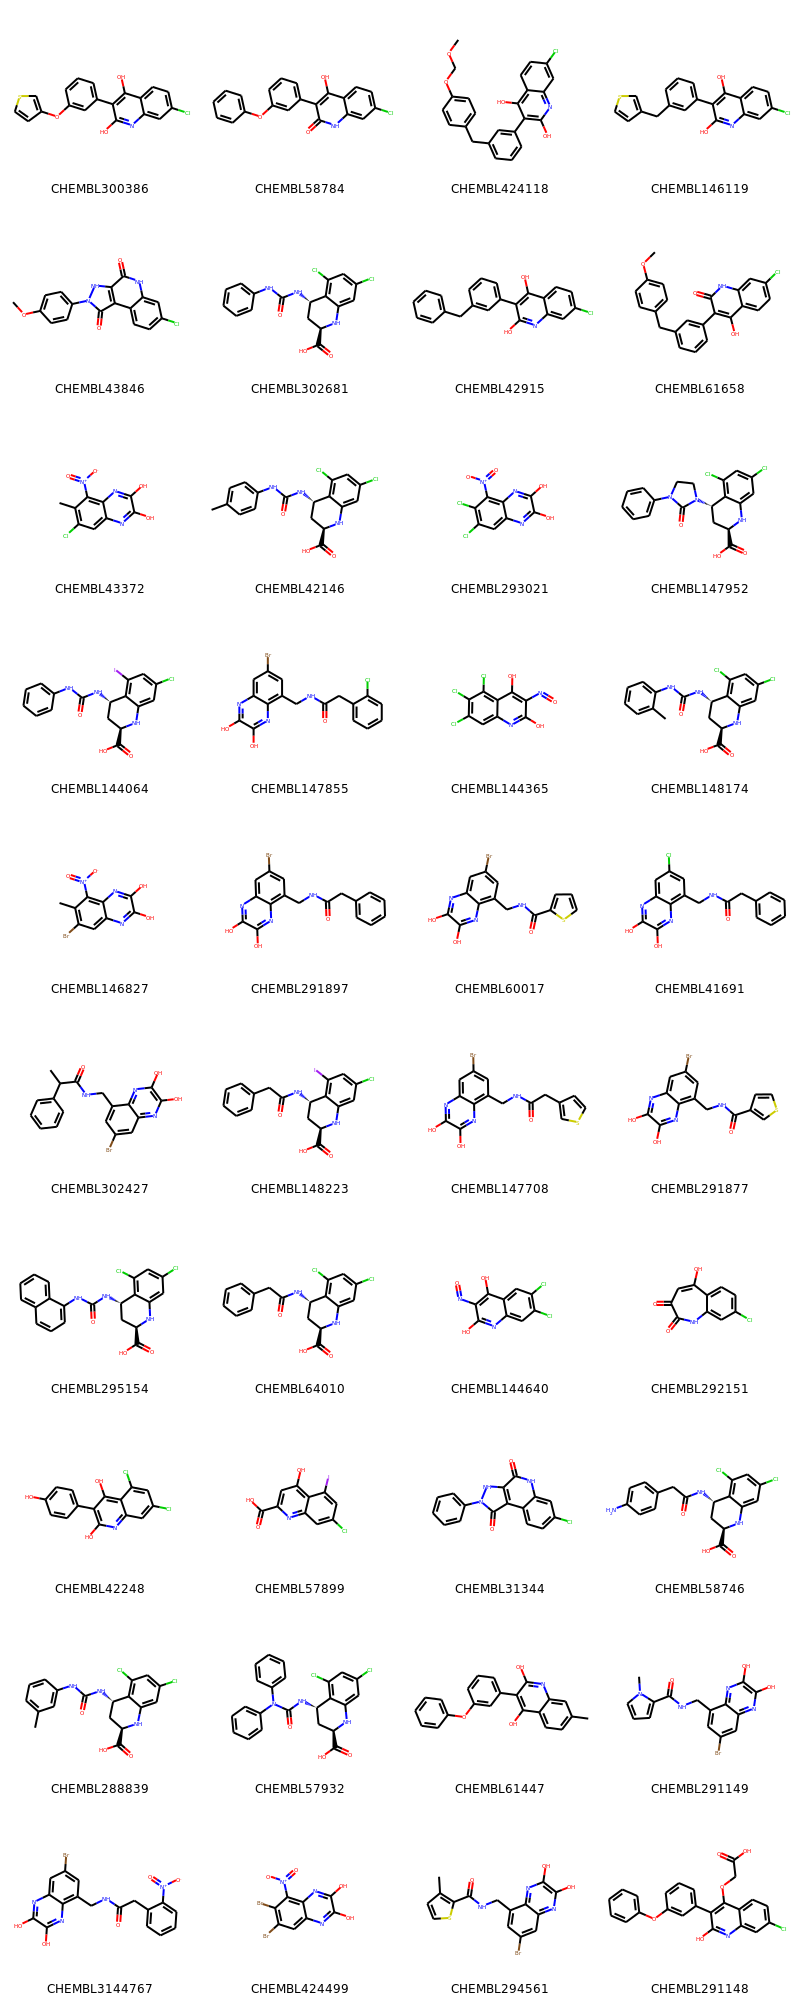

In [29]:
import subprocess
import shutil
import os
from rdkit import Chem
import itertools
from rdkit.Chem import Draw

save_path =  os.getcwd() + "/" + "molecules_mol2"
if os.path.exists(save_path):
    shutil.rmtree(save_path, ignore_errors=True)
    os.mkdir(save_path)
else:
    os.mkdir(save_path)
    
    
#print(output_df.drop)

for index, row in output_df.iterrows():
    #print(row['smiles'])
    smile_list =[row['smiles']] 
    chembl_id_list =[row['molecule_chembl_id']] 
    openbabel="/home/jyosa/anaconda3/bin/obabel"
    subprocess.call(openbabel + str("\t-:\"") +   row['smiles']  + str("\"\t-omol2\t") + "-O" + save_path + "/" + str(row['molecule_chembl_id']) + ".mol2 --gen3d", shell=True)
Draw.MolsToGridImage(list(output_df.ROMol[0:40]), 
                    legends=list(output_df.molecule_chembl_id[50:240]), 
                    molsPerRow=4) 